# Real network from Therion survey (P. Vernant data)

This notebook uses a real data set and demonstrates how karstnet can be used to:
- load the geometry of karstic network from two ASCII files or a Therion SQL file;
- plot the geometry and its simplification;
- computes the statistical properties of the network.
- plot density map of orientations and rose diagram

Nov. 2019 -updated Aug. 2020

In [3]:
import karstnet as kn

### Load the data

The karstnet functions are belonging to the "base" module. 
To read a data file, different options are available. The simplest is the "from_nodlink_dat" function (commented first example below).
But you can also **import the data from a SQL file created with Therion** from a caving survey, thanks to the "from_therion_sql" function:

In [4]:
# Load the data set (classic node/links data)
# huttes = kn.from_nodlink_dat( '../data/Huttes' )  # '../data/Huttes' is the base name to access the 2 input ASCII files

huttes = kn.from_therion_sql( '../data/g_huttes' )  # '../data/g_huttes' is the base name to access to g_huttes.sql


 This network contains  1  connected components

Graph successfully created from file !



### Visual check

Karstnet offers a set of simple functions to check that the data that you just loaded have been properly imported. 

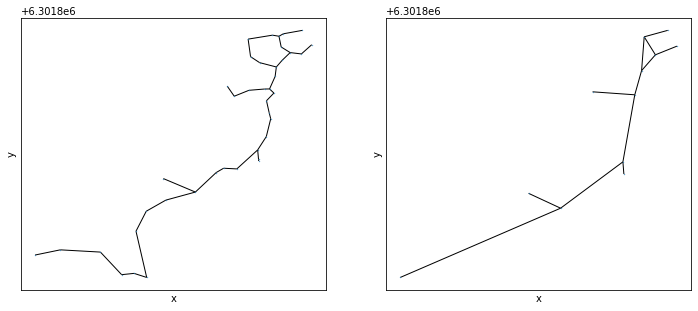

In [5]:
# Simple map view of original data (left) and simplified graph (right)
huttes.plot()

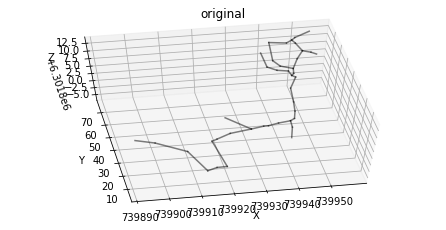

In [6]:
# Visualization of the original data
huttes.plot3(zrotation=60, xyrotation=10)

d:\codes_opensource\karstnet\karstnet\base.py:353: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


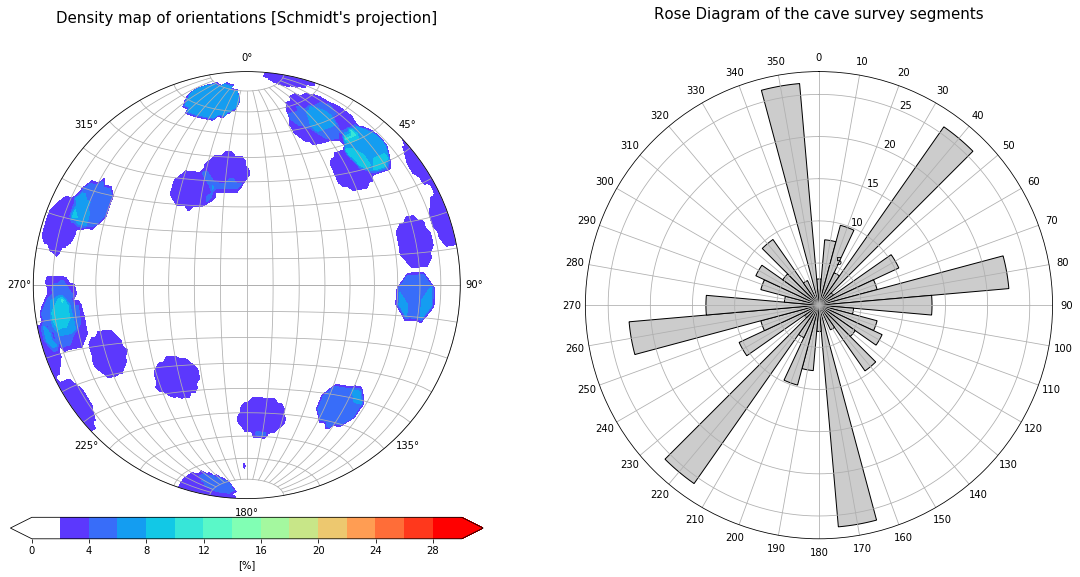

In [7]:
# Density map of orientation and rose diagram (use mplsstereonet library)
huttes.stereo()

(Upd. 26.08.2020) : To get Stereo and Rose diagram without weigthing by the lengths of the conduits, the option "weighted = False" can be used. As seen here, ignoring it can have a non negligeable impact...

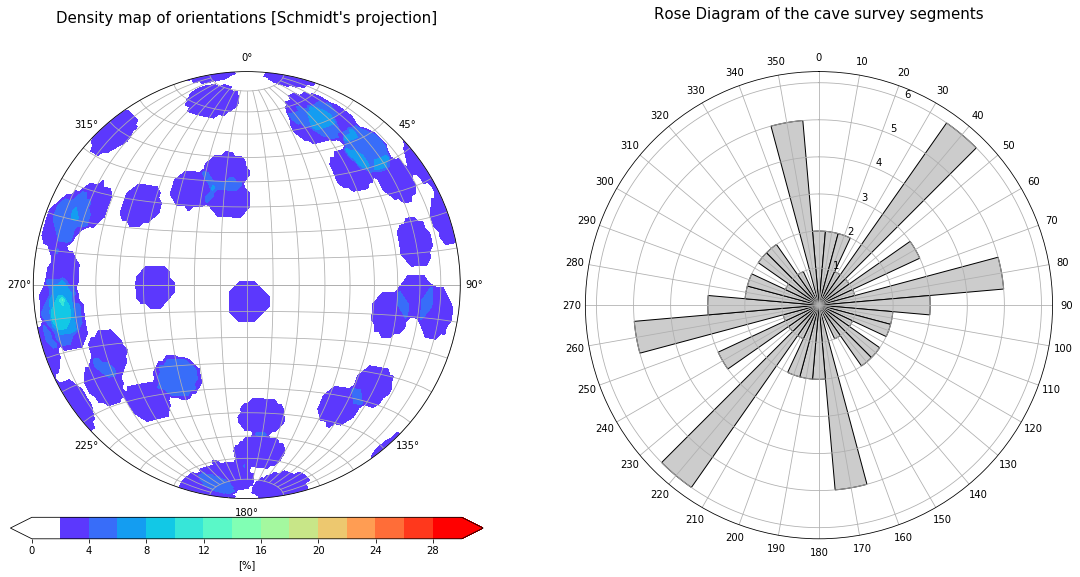

In [8]:
huttes.stereo(weighted = False)

### Computing the statistical metrics

The simplest way to obtain all the statistics for that graph is to call the characterize_graph function as follows.

In [7]:
results = huttes.characterize_graph( verbose=True )

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 15.872
                 cv length = 0.999
            length entropy = 0.512
                tortuosity = 1.207
       orientation entropy = 0.977
                      aspl = 3.015
                       cpd = 0.474
               mean degree = 2.000
                 cv degree = 0.500
 correlation vertex degree = -0.333
--------------------------------------


Compute basic graph analysis and Howard's parameters

In [8]:
huttes.basic_analysis()


 This network contains :
 41  nodes (stations) and  41  edges.
  On the simplified graph, there are :  12  nodes (stations) and  12  edges,
 6  are extremity nodes (entries or exits) and  6  are junction nodes.
There is/are  1  connected component.s and  1  cycle.s.


Howard's parameter are (Howard, 1970) :  
 alpha:  0.05263157894736842 
 beta 1.0 
 gamma 0.4

Note that this computation considers the node of degree 2  necessary to loop preservations as Seed Nodes, in order to  stay consistent with Howard's illustrations.
